### Importation des bibliothèques et chargement des données

Nous commençons par importer les bibliothèques nécessaires et charger les données d'entraînement et de test. Ensuite, nous examinerons les premières lignes et les informations générales sur les données.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Chargement des données
train = pd.read_csv('./data/training.csv')
test = pd.read_csv('./data/validation.csv')



In [42]:
# Affichage des premières lignes et des informations sur les données d'entraînement
print("Premières lignes du jeu de données d'entraînement:")
print(train.head())
print("\nInformations sur les données d'entraînement:")
print(train.info())



Premières lignes du jeu de données d'entraînement:
  CUSTOMER_ID COLLEGE        DATA   INCOME  OVERCHARGE  LEFTOVER     HOUSE  \
0     C100000    zero  660.000000  19995.0           0         0  897338.0   
1     C100001     one  317.647059  31477.0         155        15  393396.0   
2     C100006    zero  208.695652  66742.0           0        13  937197.0   
3     C100008    zero  265.017668  40864.0         183         0  986430.0   
4     C100010     one  440.000000  43321.5         200         0  394622.0   

  LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
0        False      4          3    160.0            155   
1         True      0          1    100.0            245   
2        False      4          2    127.0            493   
3        False      3          3     86.0            390   
4         True      2          3     77.0            175   

   OVER_15MINS_CALLS_PER_MONTH  TIME_CLIENT  AVERAGE_CALL_DURATION  \
0                            1          1.2      

In [43]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes dans le jeu d'entraînement:")
print(train.isnull().sum())




Valeurs manquantes dans le jeu d'entraînement:
CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          635
LESSTHAN600k                   635
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
dtype: int64


In [44]:
print("\nValeurs manquantes dans le jeu de test:")
print(test.isnull().sum())


Valeurs manquantes dans le jeu de test:
CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          199
LESSTHAN600k                   199
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64


### Traitement des valeurs manquantes

Nous allons traiter les valeurs manquantes uniquement dans le jeu d'entraînement. Pour 'HOUSE', nous utiliserons la médiane. Pour 'LESSTHAN600k', nous la déduirons de 'HOUSE' après imputation.

In [45]:
# Imputation pour HOUSE dans le jeu d'entraînement seulement
house_median = train['HOUSE'].median()
train['HOUSE'].fillna(house_median, inplace=True)

# Mise à jour de LESSTHAN600k basée sur HOUSE
train['LESSTHAN600k'] = (train['HOUSE'] < 600000).astype(int)

# Vérification des valeurs manquantes après imputation
print("Valeurs manquantes dans le jeu d'entraînement après imputation:")
print(train.isnull().sum())

print("\nValeurs manquantes dans le jeu de test (non modifié):")
print(test.isnull().sum())

Valeurs manquantes dans le jeu d'entraînement après imputation:
CUSTOMER_ID                    0
COLLEGE                        0
DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
LESSTHAN600k                   0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURNED                        0
dtype: int64

Valeurs manquantes dans le jeu de test (non modifié):
CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          

C:\Users\kamts\AppData\Local\Temp\ipykernel_35384\2371859383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['HOUSE'].fillna(house_median, inplace=True)


### Analyse exploratoire des données (EDA)

Maintenant que nous avons traité les valeurs manquantes, nous allons procéder à une analyse plus approfondie de nos données, en nous concentrant sur les distributions des variables et leurs relations avec la variable cible 'CHURNED'.

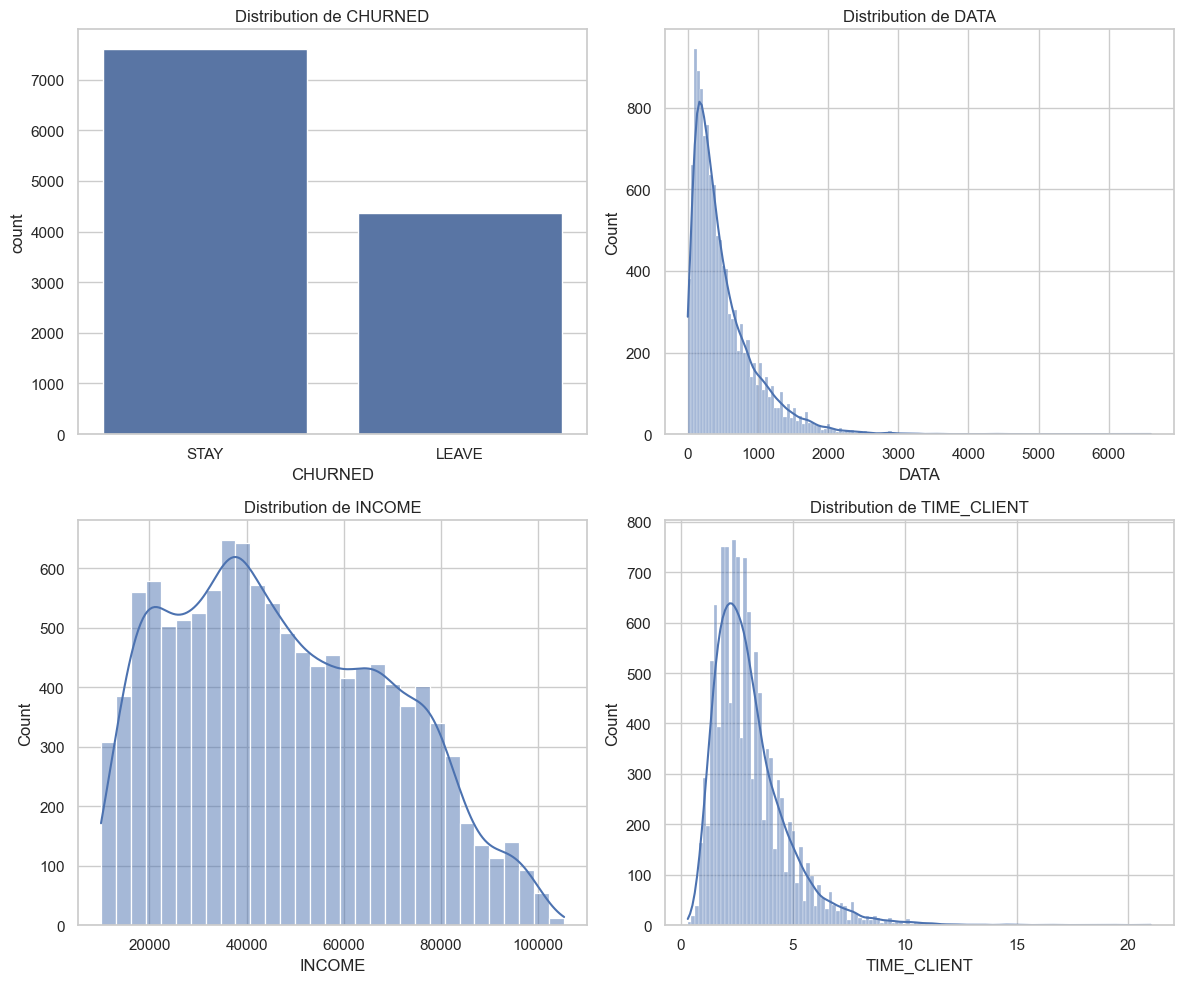

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour une meilleure lisibilité des graphiques
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Distribution de la variable cible
plt.subplot(2, 2, 1)
sns.countplot(x='CHURNED', data=train)
plt.title('Distribution de CHURNED')

# Distribution de quelques variables numériques importantes
plt.subplot(2, 2, 2)
sns.histplot(data=train, x='DATA', kde=True)
plt.title('Distribution de DATA')

plt.subplot(2, 2, 3)
sns.histplot(data=train, x='INCOME', kde=True)
plt.title('Distribution de INCOME')

plt.subplot(2, 2, 4)
sns.histplot(data=train, x='TIME_CLIENT', kde=True)
plt.title('Distribution de TIME_CLIENT')

plt.tight_layout()
plt.show()



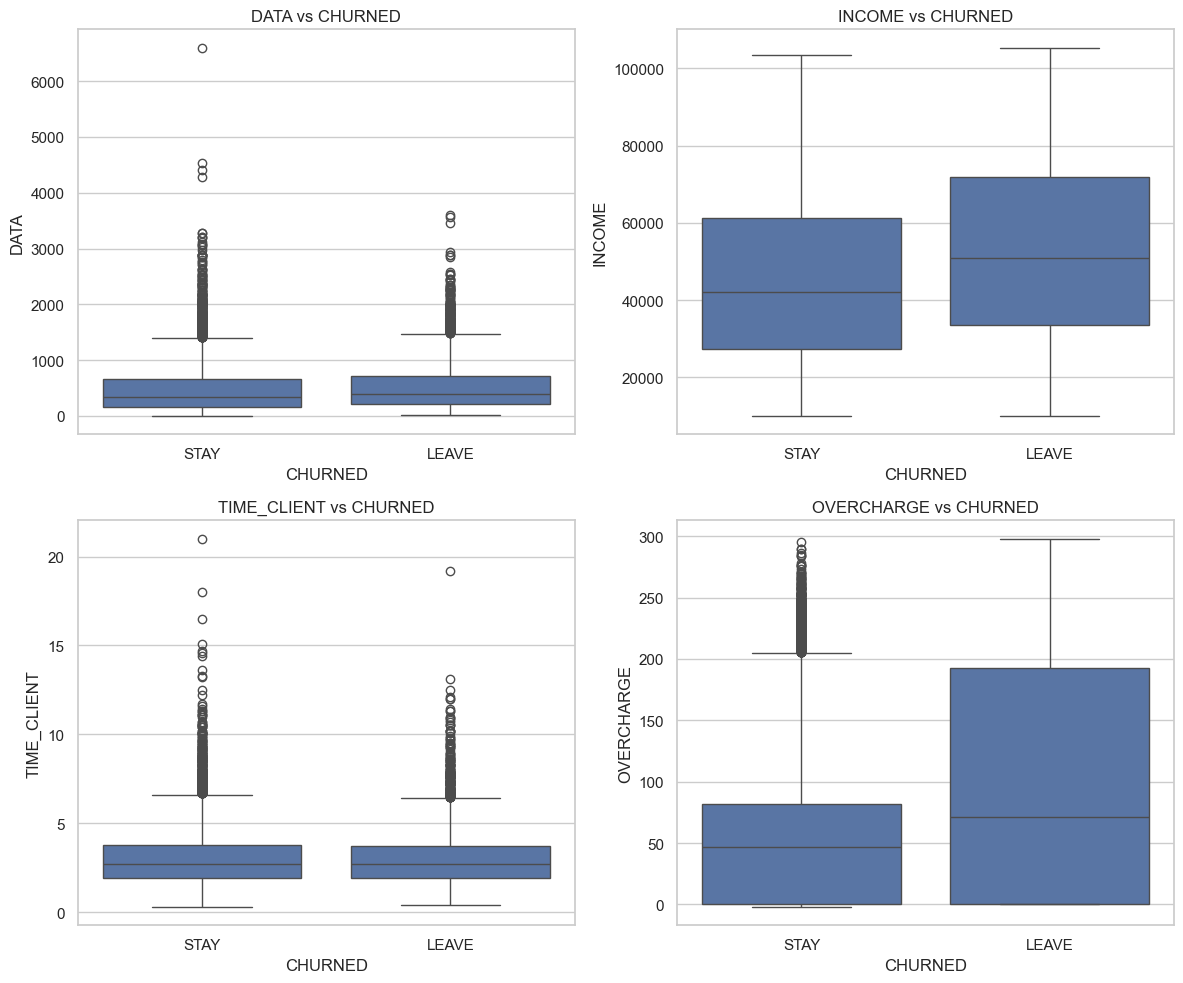

In [47]:
# Relation entre variables numériques et CHURNED
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='CHURNED', y='DATA', data=train)
plt.title('DATA vs CHURNED')

plt.subplot(2, 2, 2)
sns.boxplot(x='CHURNED', y='INCOME', data=train)
plt.title('INCOME vs CHURNED')

plt.subplot(2, 2, 3)
sns.boxplot(x='CHURNED', y='TIME_CLIENT', data=train)
plt.title('TIME_CLIENT vs CHURNED')

plt.subplot(2, 2, 4)
sns.boxplot(x='CHURNED', y='OVERCHARGE', data=train)
plt.title('OVERCHARGE vs CHURNED')

plt.tight_layout()
plt.show()



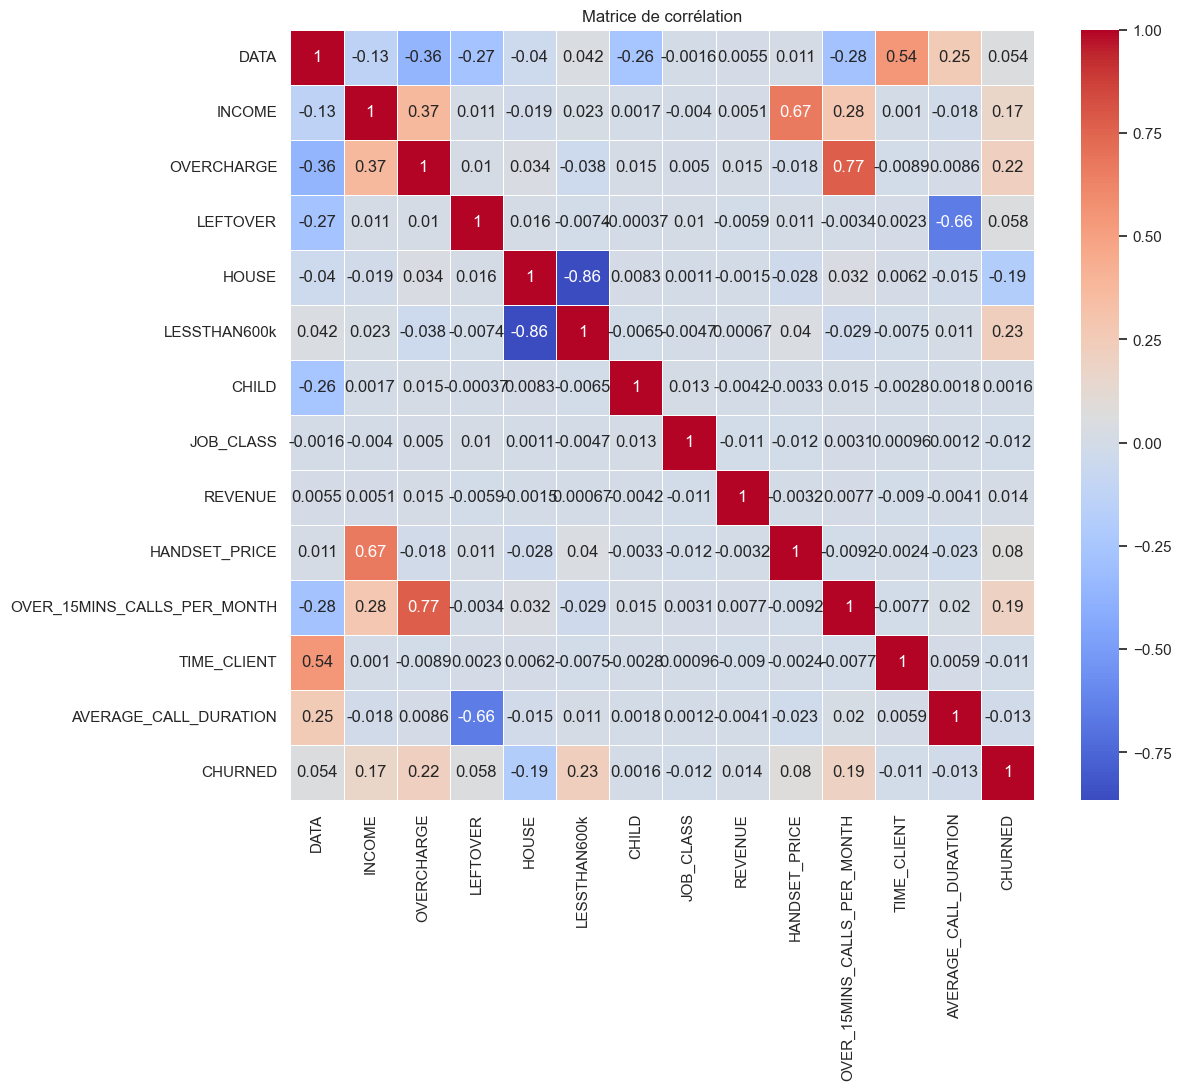

Top 5 des variables les plus corrélées avec CHURNED:
CHURNED                        1.000000
LESSTHAN600k                   0.225779
OVERCHARGE                     0.217188
OVER_15MINS_CALLS_PER_MONTH    0.194973
INCOME                         0.169475
Name: CHURNED, dtype: float64


In [48]:
# Convertion CHURNED en valeurs numériques
train['CHURNED'] = train['CHURNED'].map({'STAY': 0, 'LEAVE': 1})

# Sélectionnons uniquement les colonnes numériques
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
corr = train[numeric_columns].corr()

# Affichons la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

# Affichons des principales corrélations avec CHURNED
print("Top 5 des variables les plus corrélées avec CHURNED:")
print(corr['CHURNED'].sort_values(ascending=False).head())

### Transformation des variables fortement asymétriques : DATA et TIME_CLIENT

- Les variables DATA et TIME_CLIENT sont fortement asymétriques. La transformation logarithmique peut aider à normaliser leur distribution, ce qui est souvent bénéfique pour de nombreux algorithmes de machine learning.
- Cette approche est appropriée car elle préserve l'ordre relatif des données tout en réduisant l'impact des valeurs extrêmes.

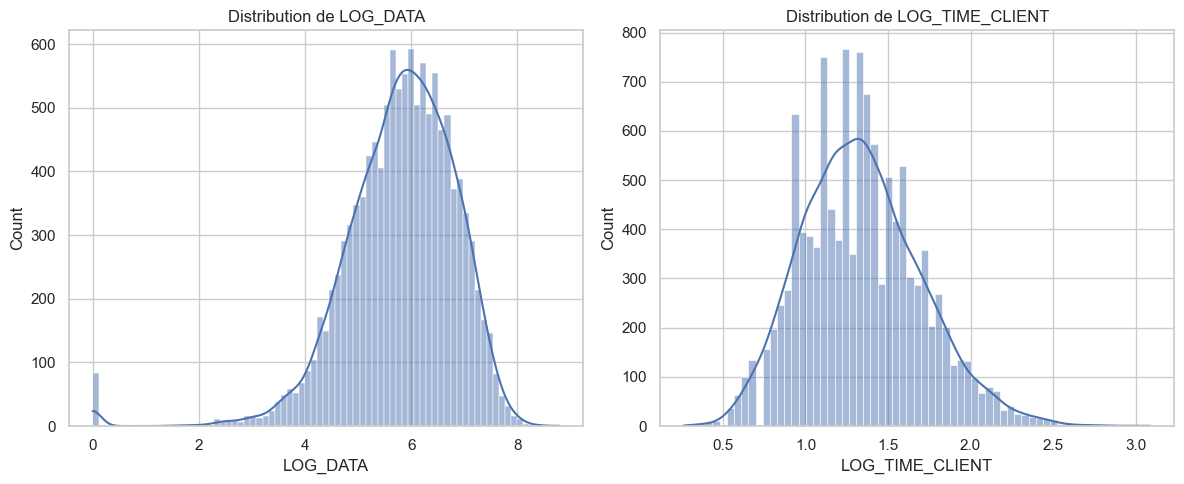

In [49]:
import numpy as np

# Transformation logarithmique de DATA et TIME_CLIENT
train['LOG_DATA'] = np.log1p(train['DATA'])
train['LOG_TIME_CLIENT'] = np.log1p(train['TIME_CLIENT'])

# Visualisons les distributions après transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=train, x='LOG_DATA', kde=True)
plt.title('Distribution de LOG_DATA')

plt.subplot(1, 2, 2)
sns.histplot(data=train, x='LOG_TIME_CLIENT', kde=True)
plt.title('Distribution de LOG_TIME_CLIENT')

plt.tight_layout()
plt.show()

### Analyse plus détaillée de la relation entre OVERCHARGE et CHURNED 

- OVERCHARGE est l'une des variables les plus corrélées avec CHURNED. Une analyse plus détaillée peut nous aider à comprendre comment elle influence le churn.
- Les boxplots nous donneront une vue d'ensemble de la distribution d'OVERCHARGE pour chaque groupe (STAY et LEAVE).

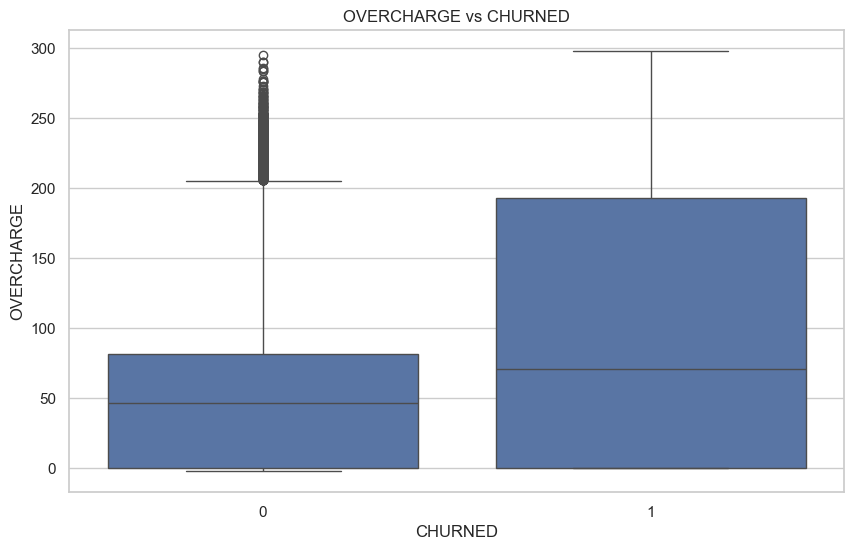

Moyenne d'OVERCHARGE par groupe:
CHURNED
0     66.267867
1    104.433738
Name: OVERCHARGE, dtype: float64


In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHURNED', y='OVERCHARGE', data=train)
plt.title('OVERCHARGE vs CHURNED')
plt.show()

# Calculons les moyennes d'OVERCHARGE pour chaque groupe
overcharge_means = train.groupby('CHURNED')['OVERCHARGE'].mean()
print("Moyenne d'OVERCHARGE par groupe:")
print(overcharge_means)

### Feature engineering : 

- Le ratio de surcharge par rapport au revenu peut être un indicateur plus pertinent que la surcharge brute.
- La catégorisation de TIME_CLIENT peut nous aider à identifier si certaines périodes de la relation client sont plus critiques pour le churn.

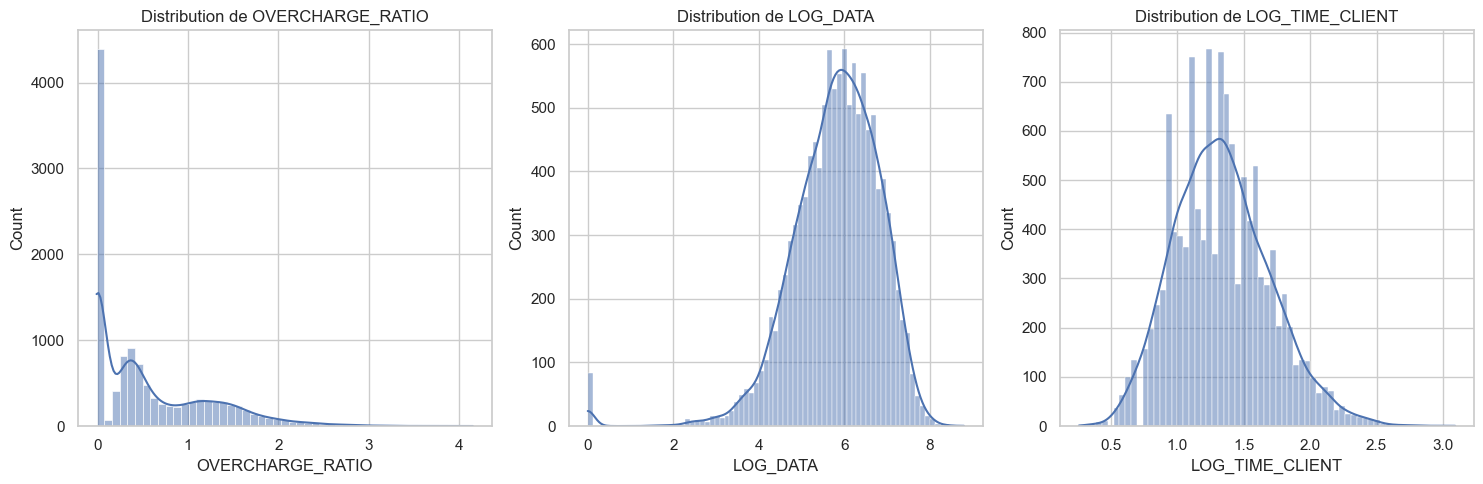

In [51]:
# Ratio de surcharge par rapport au revenu
train['OVERCHARGE_RATIO'] = train['OVERCHARGE'] / train['REVENUE']

# Transformation logarithmique de DATA et TIME_CLIENT
train['LOG_DATA'] = np.log1p(train['DATA'])
train['LOG_TIME_CLIENT'] = np.log1p(train['TIME_CLIENT'])

# Visualisation des nouvelles features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=train, x='OVERCHARGE_RATIO', kde=True)
plt.title('Distribution de OVERCHARGE_RATIO')

plt.subplot(1, 3, 2)
sns.histplot(data=train, x='LOG_DATA', kde=True)
plt.title('Distribution de LOG_DATA')

plt.subplot(1, 3, 3)
sns.histplot(data=train, x='LOG_TIME_CLIENT', kde=True)
plt.title('Distribution de LOG_TIME_CLIENT')

plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

# Sélection des features
features = ['LOG_DATA', 'LOG_TIME_CLIENT', 'INCOME', 'OVERCHARGE', 'OVERCHARGE_RATIO',
            'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH']

X = train[features]
y = train['CHURNED']

# Division en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred_proba = rf_model.predict_proba(X_val_scaled)[:, 1]
print("AUC-ROC (Random Forest):", roc_auc_score(y_val, rf_pred_proba))

# Modèle Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred_proba = gb_model.predict_proba(X_val_scaled)[:, 1]
print("AUC-ROC (Gradient Boosting):", roc_auc_score(y_val, gb_pred_proba))

# Importance des features pour le modèle Random Forest
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nImportance des features (Random Forest):\n", feature_importance)

AUC-ROC (Random Forest): 0.8262364970701686
AUC-ROC (Gradient Boosting): 0.8200961026778869

Importance des features (Random Forest):
                        feature  importance
6                        HOUSE    0.168313
0                     LOG_DATA    0.160125
2                       INCOME    0.130627
7                HANDSET_PRICE    0.108828
1              LOG_TIME_CLIENT    0.107300
5                     LEFTOVER    0.094461
3                   OVERCHARGE    0.091054
4             OVERCHARGE_RATIO    0.082119
8  OVER_15MINS_CALLS_PER_MONTH    0.057173


### Optimisation des hyperparamètres:
Nous allons utiliser RandomizedSearchCV pour optimiser les hyperparamètres du modèle Random Forest, qui a donné les meilleurs résultats.

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définition de l'espace de recherche des hyperparamètres
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Recherche aléatoire des meilleurs hyperparamètres
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=param_dist, 
                               n_iter=100, cv=5, scoring='roc_auc', 
                               n_jobs=-1, random_state=42)
rf_random.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres:", rf_random.best_params_)
print("Meilleur score AUC-ROC:", rf_random.best_score_)

# Évaluation sur l'ensemble de validation
best_rf_model = rf_random.best_estimator_
best_rf_pred_proba = best_rf_model.predict_proba(X_val_scaled)[:, 1]
print("AUC-ROC (Meilleur Random Forest):", roc_auc_score(y_val, best_rf_pred_proba))

### Feature Engineering supplémentaire:
Créons de nouvelles features basées sur les interactions entre les variables les plus importantes.

In [ ]:
# Création de nouvelles features
train['HOUSE_INCOME_RATIO'] = train['HOUSE'] / train['INCOME']
train['DATA_TIME_RATIO'] = train['DATA'] / train['TIME_CLIENT']

# Mise à jour de la liste des features
features = ['LOG_DATA', 'LOG_TIME_CLIENT', 'INCOME', 'OVERCHARGE', 'OVERCHARGE_RATIO',
            'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH',
            'HOUSE_INCOME_RATIO', 'DATA_TIME_RATIO']

# Recréation de X avec les nouvelles features
X = train[features]

# Division en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Analyse des erreurs:
Examinons les prédictions incorrectes pour mieux comprendre où le modèle se trompe.

In [ ]:
# Création de nouvelles features
train['HOUSE_INCOME_RATIO'] = train['HOUSE'] / train['INCOME']
train['DATA_TIME_RATIO'] = train['DATA'] / train['TIME_CLIENT']

# Mise à jour de la liste des features
features = ['LOG_DATA', 'LOG_TIME_CLIENT', 'INCOME', 'OVERCHARGE', 'OVERCHARGE_RATIO',
            'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH',
            'HOUSE_INCOME_RATIO', 'DATA_TIME_RATIO']

# Recréation de X avec les nouvelles features
X = train[features]
y = train['CHURNED']

# Division en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



#### Appliquons le modèle optimisé avec les nouvelles features :

In [ ]:
# Réentraînement du modèle avec les meilleurs hyperparamètres trouvés précédemment
best_rf_model = RandomForestClassifier(max_depth=39, min_samples_leaf=3, 
                                       min_samples_split=2, n_estimators=478,
                                       random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Prédictions et évaluation
y_pred = best_rf_model.predict(X_val_scaled)
y_pred_proba = best_rf_model.predict_proba(X_val_scaled)[:, 1]

print("AUC-ROC (Random Forest optimisé avec nouvelles features):", 
      roc_auc_score(y_val, y_pred_proba))

# Importance des features
feature_importance = pd.DataFrame({'feature': features, 
                                   'importance': best_rf_model.feature_importances_})
print("\nImportance des features :")
print(feature_importance.sort_values('importance', ascending=False))



AUC-ROC (Random Forest optimisé avec nouvelles features): 0.8422581197968811

Importance des features :
                        feature  importance
10              DATA_TIME_RATIO    0.157937
6                         HOUSE    0.121614
9            HOUSE_INCOME_RATIO    0.106150
0                      LOG_DATA    0.100775
5                      LEFTOVER    0.089599
2                        INCOME    0.088214
3                    OVERCHARGE    0.081856
4              OVERCHARGE_RATIO    0.072120
7                 HANDSET_PRICE    0.070027
1               LOG_TIME_CLIENT    0.061680
8   OVER_15MINS_CALLS_PER_MONTH    0.050029


#### Analysons plus en détail les prédictions incorrectes 

In [ ]:
# Analyse des prédictions incorrectes
incorrect_predictions = X_val[y_pred != y_val].copy()
incorrect_predictions['CHURNED_ACTUAL'] = y_val[y_pred != y_val]
incorrect_predictions['CHURNED_PREDICTED'] = y_pred[y_pred != y_val]

print("\nDistribution des erreurs :")
print(incorrect_predictions['CHURNED_ACTUAL'].value_counts(normalize=True))

# Analyse des caractéristiques moyennes des prédictions incorrectes vs correctes
correct_predictions = X_val[y_pred == y_val]
print("\nMoyennes des caractéristiques pour les prédictions correctes :")
print(correct_predictions.mean())
print("\nMoyennes des caractéristiques pour les prédictions incorrectes :")
print(incorrect_predictions.mean())




Distribution des erreurs :
CHURNED_ACTUAL
1    0.614565
0    0.385435
Name: proportion, dtype: float64

Moyennes des caractéristiques pour les prédictions correctes :
LOG_DATA                            5.828679
LOG_TIME_CLIENT                     1.348722
INCOME                          47002.167394
OVERCHARGE                         78.613959
OVERCHARGE_RATIO                    0.559666
LEFTOVER                           22.541439
HOUSE                          518434.233370
HANDSET_PRICE                     378.199564
OVER_15MINS_CALLS_PER_MONTH         7.248092
HOUSE_INCOME_RATIO                 14.734274
DATA_TIME_RATIO                   172.249662
dtype: float64

Moyennes des caractéristiques pour les prédictions incorrectes :
LOG_DATA                            5.897506
LOG_TIME_CLIENT                     1.369394
INCOME                          48365.502664
OVERCHARGE                         83.708703
OVERCHARGE_RATIO                    0.587885
LEFTOVER                       

#### Essayons un autre algorithme de boosting, comme XGBoost 

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]
print("\nAUC-ROC (XGBoost):", roc_auc_score(y_val, xgb_pred_proba))


AUC-ROC (XGBoost): 0.8488303223265476


## Optimisation des hyperparamètres de XGBoost

Nous allons utiliser GridSearchCV pour optimiser les hyperparamètres de XGBoost.



In [ ]:
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend



param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='roc_auc', n_jobs=2)
with parallel_backend('threading'):
    grid_search.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres:", grid_search.best_params_)
print("Meilleur score AUC-ROC:", grid_search.best_score_)

# Utilisons le meilleur modèle pour faire des prédictions
best_xgb_model = grid_search.best_estimator_
xgb_pred_proba = best_xgb_model.predict_proba(X_val_scaled)[:, 1]
print("AUC-ROC (XGBoost optimisé):", roc_auc_score(y_val, xgb_pred_proba))

Meilleurs hyperparamètres: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Meilleur score AUC-ROC: 0.852120471187812
AUC-ROC (XGBoost optimisé): 0.8491708081163394


In [ ]:
# Sauvegardons le modèle optimisé pour une utilisation future
import joblib
joblib.dump(best_xgb_model, './models/best_xgb_model.joblib')


['./models/best_xgb_model.joblib']

In [ ]:
# sauvegardons le scaler pour une utilisation future
joblib.dump(scaler, './models/scaler.joblib')

['./models/scaler.joblib']

### Validation croisée pour l'évaluation finale du modèle

In [ ]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec 5 folds
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='roc_auc')

print("Résultats de la validation croisée:")
print(f"AUC-ROC moyen: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Résultats de la validation croisée:
AUC-ROC moyen: 0.8539 (+/- 0.0128)


### Testons la stabilité du modèle

In [ ]:
from sklearn.model_selection import train_test_split

# Test de stabilité
stability_scores = []
for i in range(10):
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=i)
    model_stability = XGBClassifier(**grid_search.best_params_, random_state=42)
    model_stability.fit(X_train_s, y_train_s)
    y_pred_proba_s = model_stability.predict_proba(X_test_s)[:, 1]
    stability_scores.append(roc_auc_score(y_test_s, y_pred_proba_s))


print("Test de stabilité du modèle:")
print(f"AUC-ROC moyen: {np.mean(stability_scores):.4f} (+/- {np.std(stability_scores) * 2:.4f})")

Test de stabilité du modèle:
AUC-ROC moyen: 0.8546 (+/- 0.0060)


### Comparaison de l'importance des features
Comparons maintenant l'importance des features entre Random Forest et XGBoost.

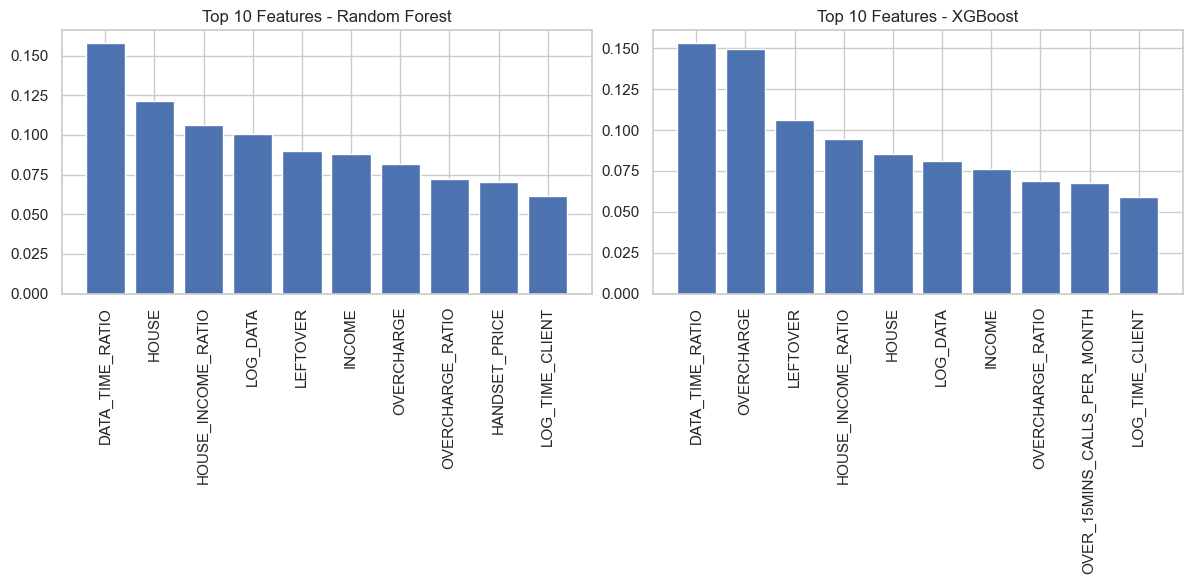

In [ ]:
import matplotlib.pyplot as plt

# Importance des features pour Random Forest
rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Importance des features pour XGBoost
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualisation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(rf_importance['feature'][:10], rf_importance['importance'][:10])
plt.title('Top 10 Features - Random Forest')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(xgb_importance['feature'][:10], xgb_importance['importance'][:10])
plt.title('Top 10 Features - XGBoost')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Analyse des prédictions incorrectes

In [ ]:
# Prédictions de XGBoost
xgb_predictions = best_xgb_model.predict(X_val_scaled)

# Prédictions incorrectes
incorrect_xgb = X_val[y_val != xgb_predictions].copy()
incorrect_xgb['actual'] = y_val[y_val != xgb_predictions]
incorrect_xgb['predicted'] = xgb_predictions[y_val != xgb_predictions]

# Comparaison avec Random Forest
rf_predictions = best_rf_model.predict(X_val_scaled)
incorrect_rf = X_val[y_val != rf_predictions]

print("Nombre de prédictions incorrectes (XGBoost):", len(incorrect_xgb))
print("Nombre de prédictions incorrectes (Random Forest):", len(incorrect_rf))

# Exemples de prédictions incorrectes communes
common_incorrect = incorrect_xgb.index.intersection(incorrect_rf.index)
print("\nExemples de prédictions incorrectes communes:")
print(incorrect_xgb.loc[common_incorrect].head())

Nombre de prédictions incorrectes (XGBoost): 555
Nombre de prédictions incorrectes (Random Forest): 563

Exemples de prédictions incorrectes communes:
       LOG_DATA  LOG_TIME_CLIENT   INCOME  OVERCHARGE  OVERCHARGE_RATIO  \
1766   4.930870         1.163151  33974.0           0          0.000000   
8796   6.228144         1.757858  40256.5         244          1.232323   
11569  6.597907         1.435085  57125.0          72          0.699029   
6518   5.481956         1.335001  66336.5         251          2.057377   
7579   4.974400         1.481605  28287.5           0          0.000000   

       LEFTOVER     HOUSE  HANDSET_PRICE  OVER_15MINS_CALLS_PER_MONTH  \
1766         38  570370.0            281                            0   
8796         65  407332.0            208                           16   
11569         0  399605.0            344                            4   
6518         22  538728.0            367                            4   
7579         61  222784.0        

### Analyse approfondie des features importantes 

DATA_TIME_RATIO étant la feature la plus importante pour les deux modèles, nous devrions l'examiner plus en détail 

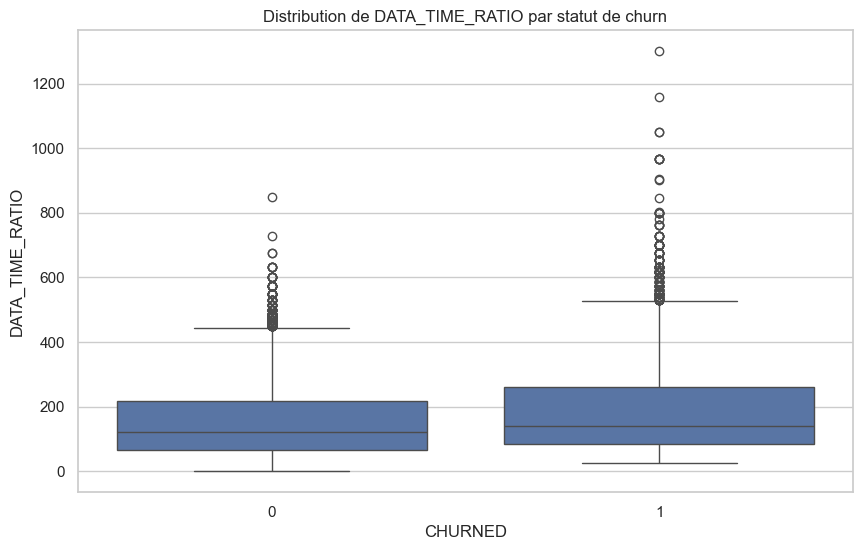

          count        mean         std        min        25%         50%  \
CHURNED                                                                     
0        7612.0  155.538347  116.214300   0.000000  65.182024  122.648471   
1        4369.0  187.703969  147.004206  24.813896  84.033613  139.949109   

                75%          max  
CHURNED                           
0        218.319082   849.673203  
1        262.008734  1300.000000  


In [ ]:
# Visualisation de la distribution de DATA_TIME_RATIO par rapport au churn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='CHURNED', y='DATA_TIME_RATIO', data=train)
plt.title('Distribution de DATA_TIME_RATIO par statut de churn')
plt.show()

# Calcul des statistiques descriptives
print(train.groupby('CHURNED')['DATA_TIME_RATIO'].describe())

### Analyse des interactions entre features 

Examinons les interactions entre les features les plus importantes 

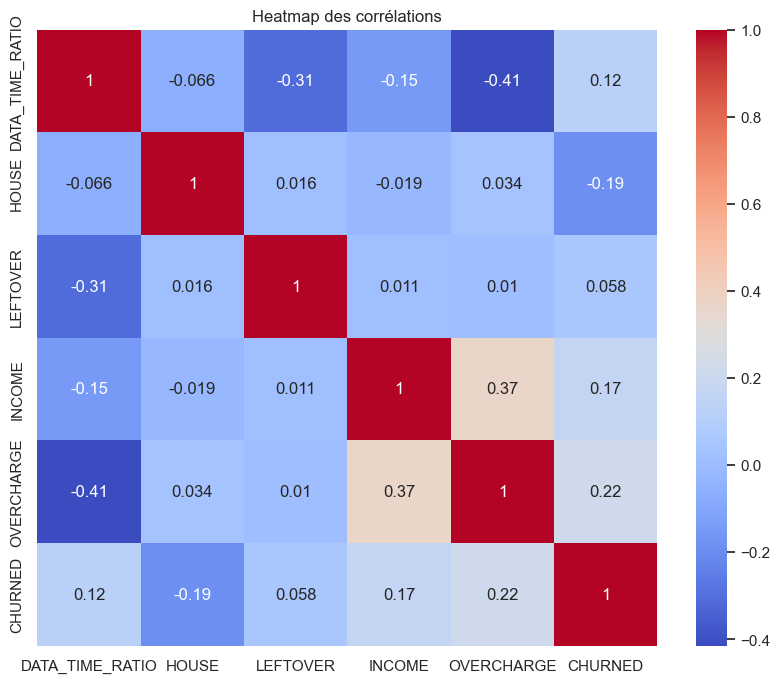

In [ ]:
# Heatmap des corrélations
corr_matrix = train[['DATA_TIME_RATIO', 'HOUSE', 'LEFTOVER', 'INCOME', 'OVERCHARGE', 'CHURNED']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations')
plt.show()

### Analyse des faux positifs et faux négatifs 

Identifions les caractéristiques des clients mal classés 

In [ ]:
y_pred = best_xgb_model.predict(X_val_scaled)
false_positives = X_val[(y_pred == 1) & (y_val == 0)]
false_negatives = X_val[(y_pred == 0) & (y_val == 1)]

print("Profil moyen des faux positifs :")
print(false_positives.mean())
print("\nProfil moyen des faux négatifs :")
print(false_negatives.mean())

Profil moyen des faux positifs :
LOG_DATA                            5.729070
LOG_TIME_CLIENT                     1.314241
INCOME                          51254.847458
OVERCHARGE                        108.067797
OVERCHARGE_RATIO                    0.760148
LEFTOVER                           31.610169
HOUSE                          404421.404661
HANDSET_PRICE                     386.127119
OVER_15MINS_CALLS_PER_MONTH         9.220339
HOUSE_INCOME_RATIO                  9.426737
DATA_TIME_RATIO                   150.428711
dtype: float64

Profil moyen des faux négatifs :
LOG_DATA                            5.983757
LOG_TIME_CLIENT                     1.386556
INCOME                          47253.656740
OVERCHARGE                         65.438871
OVERCHARGE_RATIO                    0.458893
LEFTOVER                           22.623824
HOUSE                          510816.186520
HANDSET_PRICE                     402.874608
OVER_15MINS_CALLS_PER_MONTH         5.868339
HOUSE_INCOME_RATIO

### Courbe ROC et seuil optimal 

Trouvons le seuil optimal pour équilibrer précision et rappel 

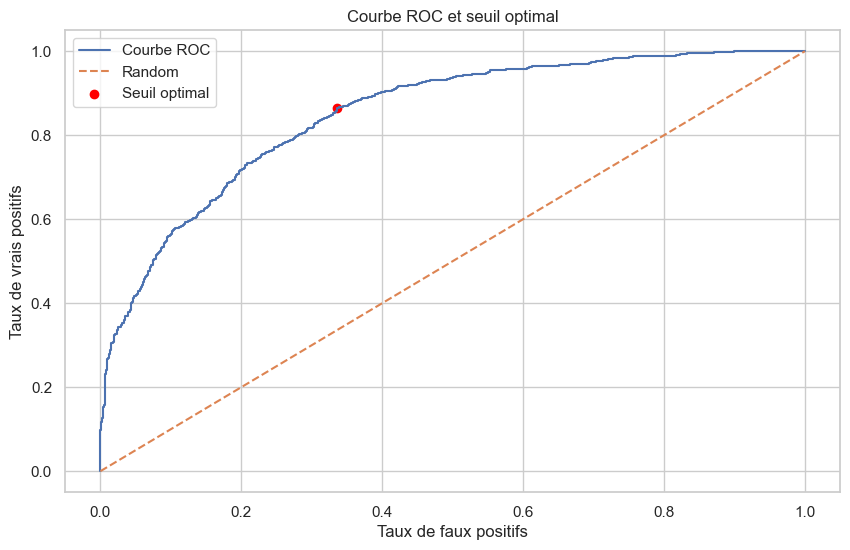

Seuil optimal : 0.2597881853580475


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, xgb_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Seuil optimal')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC et seuil optimal')
plt.legend()
plt.show()

print(f"Seuil optimal : {optimal_threshold}")

### Analyse de l'importance des features temporelles 

Si nous avons des données temporelles, analysons leur impact 

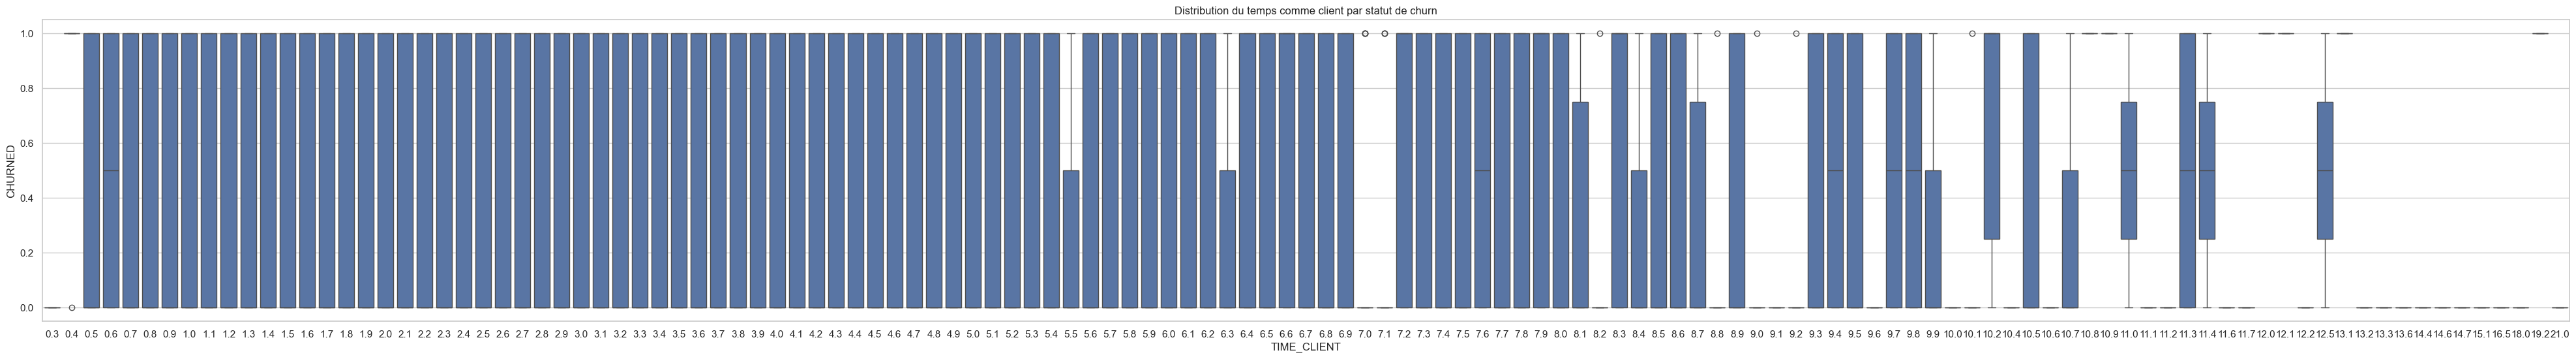

In [ ]:
plt.figure(figsize=(50, 6))
sns.boxplot(x='TIME_CLIENT', y='CHURNED', data=train)
plt.title('Distribution du temps comme client par statut de churn')
plt.show()

### Segmentation des clients 

Essayons de segmenter les clients pour voir s'il y a des groupes plus susceptibles de churn 

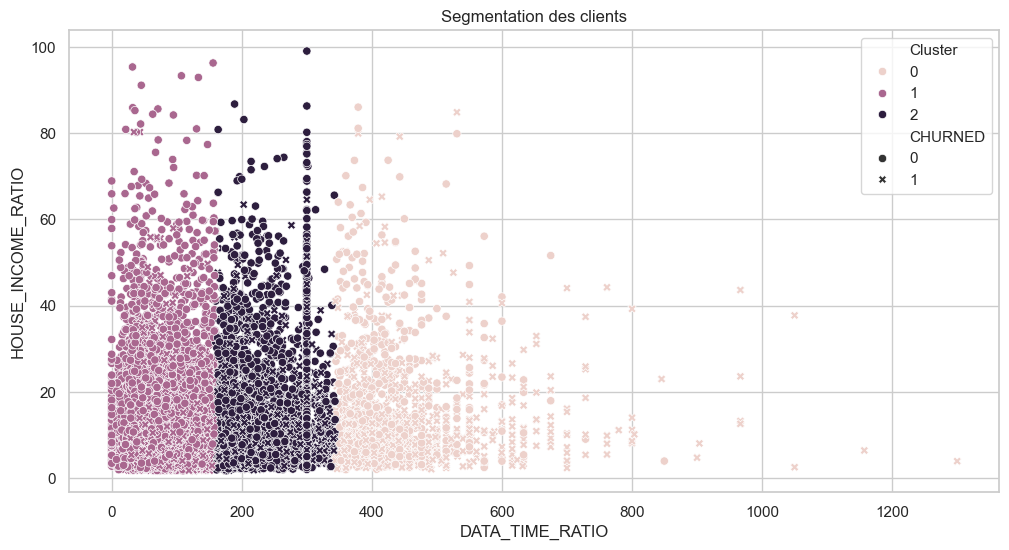

Cluster
0    0.498759
1    0.344632
2    0.359043
Name: CHURNED, dtype: float64


In [ ]:
from sklearn.cluster import KMeans

features_for_clustering = ['DATA_TIME_RATIO', 'HOUSE_INCOME_RATIO', 'OVERCHARGE_RATIO']
kmeans = KMeans(n_clusters=3, random_state=42)
train['Cluster'] = kmeans.fit_predict(train[features_for_clustering])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='DATA_TIME_RATIO', y='HOUSE_INCOME_RATIO', hue='Cluster', style='CHURNED')
plt.title('Segmentation des clients')
plt.show()

print(train.groupby('Cluster')['CHURNED'].mean())

### Préparation des données de test 

In [ ]:
# Appliquons les mêmes transformations au jeu de test
test['LOG_DATA'] = np.log1p(test['DATA'])
test['LOG_TIME_CLIENT'] = np.log1p(test['TIME_CLIENT'])
test['HOUSE_INCOME_RATIO'] = test['HOUSE'] / test['INCOME']
test['DATA_TIME_RATIO'] = test['DATA'] / test['TIME_CLIENT']
test['OVERCHARGE_RATIO'] = test['OVERCHARGE'] / test['REVENUE']

# Sélectionnons les mêmes features que pour l'entraînement
X_test = test[features]

# Normalisons les données de test
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Prédictions sur l'ensemble de test
test['CHURN_PROBABILITY'] = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

### Définition des labels de churn 

In [ ]:
# Utilisation du seuil optimal trouvé précédemment (0.2597881853580475)
test['CHURN_LABEL'] = test['CHURN_PROBABILITY'].apply(lambda x: 'LEAVE' if x >= 0.2597881853580475 else 'STAY')

### Calculer le profit moyen par client 


In [ ]:
   # Calcul du profit moyen par client
average_profit = train['REVENUE'].mean() + train['OVERCHARGE'].mean()
   
print("Profit moyen par client:", average_profit)

Profit moyen par client: 235.72740171938904


### Détermination des clients à contacter 

In [ ]:
# Calculons le profit moyen par client
average_profit = train['REVENUE'].mean() + train['OVERCHARGE'].mean()

# Seuil de rentabilité pour contacter un client
contact_threshold = 10 / average_profit

test['CLIENT_TO_CONTACT'] = test['CHURN_PROBABILITY'].apply(lambda x: 'YES' if x >= contact_threshold else 'NO')

### Calcul du discount maximal

In [ ]:
max_discount = average_profit - 10  # Le discount ne doit pas dépasser le profit moins le coût de contact

test['DISCOUNT'] = test['CHURN_PROBABILITY'].apply(lambda x: min(round(10 * x, 2), max_discount))

### Création et exportation du fichier CSV final

In [ ]:
final_results = test[['CUSTOMER_ID', 'CHURN_PROBABILITY', 'CHURN_LABEL', 'CLIENT_TO_CONTACT', 'DISCOUNT']]
final_results = final_results.sort_values(by='CHURN_PROBABILITY', ascending=False)
final_results.to_csv('./data/final_predictions.csv', index=False)

# Approche de calcul pour la prédiction et la gestion du churn

## 1. Préparation des données de test

- Application des mêmes transformations que sur les données d'entraînement :
  - Logarithme de DATA et TIME_CLIENT
  - Création de ratios : HOUSE_INCOME_RATIO, DATA_TIME_RATIO, OVERCHARGE_RATIO
- Sélection des mêmes features que pour l'entraînement
- Normalisation des données avec le même scaler que pour l'entraînement

## 2. Prédiction des probabilités de churn

- Utilisation du modèle XGBoost optimisé pour prédire les probabilités de churn

## 3. Classification churn/non-churn

- Utilisation du seuil optimal (0.2597881853580475) déterminé par l'analyse de la courbe ROC
- Classification en 'LEAVE' si la probabilité est supérieure ou égale au seuil, 'STAY' sinon

## 4. Détermination des clients à contacter

- Calcul du profit moyen par client : `average_profit = moyenne(REVENUE + OVERCHARGE)`
- Calcul du seuil de rentabilité : `contact_threshold = 10 / average_profit`
  (10€ étant le coût fixe de contact d'un client)
- Un client est à contacter si sa probabilité de churn est supérieure à ce seuil

## 5. Calcul du discount maximal

- Discount maximal : `max_discount = average_profit - 10`
  (on ne peut pas offrir plus que le profit attendu moins le coût de contact)
- Le discount proposé est proportionnel à la probabilité de churn :
  `discount = min(10 * probabilité_churn, max_discount)`
  (multiplié par 10 pour avoir un pourcentage plus significatif, plafonné au discount maximal)

## 6. Génération du fichier final

- Création d'un DataFrame avec les colonnes : CUSTOMER_ID, CHURN_PROBABILITY, CHURN_LABEL, CLIENT_TO_CONTACT, DISCOUNT
- Tri des résultats par probabilité de churn décroissante
- Export au format CSV

Cette approche permet de :
- Identifier les clients à risque de churn
- Déterminer de manière rentable quels clients contacter
- Proposer un discount personnalisé et économiquement viable
- Prioriser les actions de rétention sur les clients les plus à risque